# Projeto 3 - Previsão de Bicicletas Alugadas

### Temos como obtetivo classificar o numero de Bicicletas alugadas (Coluna CNT) a partir dos previsores do dataset

### Importação das bibliotecas

In [64]:
import pandas as pd 
import matplotlib.pyplot as plt 
import tensorflow as tf 
import seaborn as sb 
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from math import sqrt
%matplotlib inline

In [2]:
tf.__version__

'2.1.0'

### Importação do dataset

In [3]:
dataset = pd.read_csv(r"C:\Users\gusta\Desktop\3°Projeto-PrevisaoBibicletasAlugadas\dataset.csv")
dataset.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt
0,1,1/1/2011,1,0,1,0,6,0,2,0.344167,0.805833,0.160446,331,654,985
1,2,1/2/2011,1,0,1,0,0,0,2,0.363478,0.696087,0.248539,131,670,801
2,3,1/3/2011,1,0,1,0,1,1,1,0.196364,0.437273,0.248309,120,1229,1349
3,4,1/4/2011,1,0,1,0,2,1,1,0.200000,0.590435,0.160296,108,1454,1562
4,5,1/5/2011,1,0,1,0,3,1,1,0.226957,0.436957,0.186900,82,1518,1600


In [4]:
dataset.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.972500,0.507463,3410.000000,6946.000000,8714.000000


### Analises iniciais do dataset

* #### Visualização da distribuição de alugueis durante o ano 

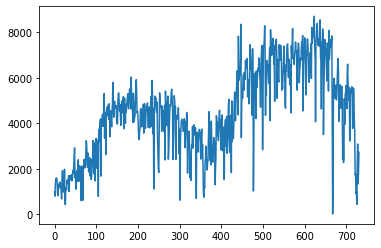

In [12]:
dataset['cnt'].asfreq('M').plot()

* #### Visualização da correlação entre as variaveis 

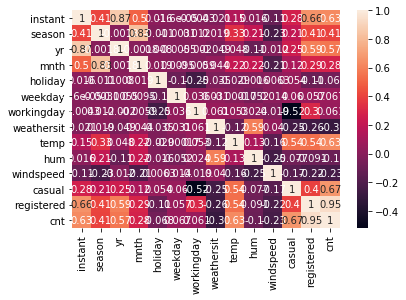

In [14]:
sb.heatmap(dataset.corr(),annot=True)

Pela ultima coluna podemos ver quais variávies possuem mais relação com o crescimento ou decrescimento do aluguel de bicicletas, como:
* A Temperatura ambiente tem grande influencia positiva com o aluguel
* A velocidade do vento tem grande influencia negativa com o aluguel
    * Podemos observar claramente essas duas influencias nos graficos abaixo:

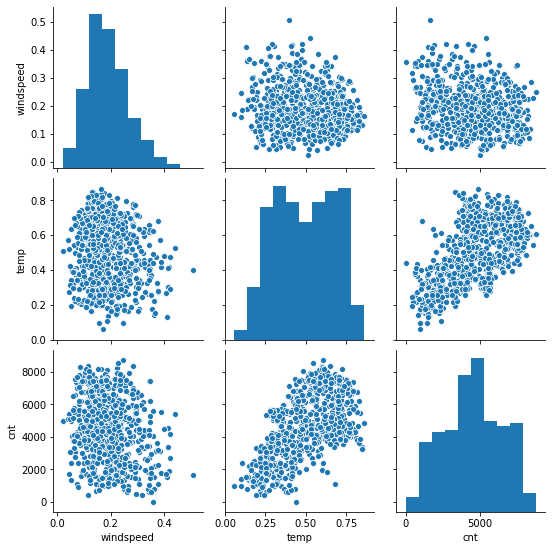

In [15]:
sb.pairplot(dataset[['windspeed','temp','cnt']])

### Pré Processamento do dataset 

* ##### Verificando a Existência de valores NaN ( Not a Number), por meio do heatmap 

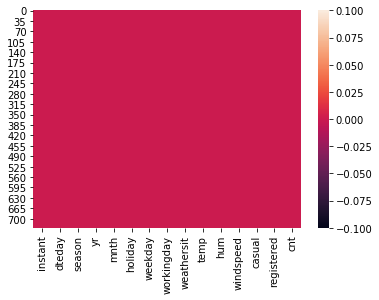

In [16]:
sb.heatmap(dataset.isnull());

Como a cor do Heatmap está totalmente uniforme, o dataset não aprensenta valores NaN, o que também pode ser confirmado abaixo 

In [17]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  hum         731 non-null    float64
 11  windspeed   731 non-null    float64
 12  casual      731 non-null    int64  
 13  registered  731 non-null    int64  
 14  cnt         731 non-null    int64  
dtypes: float64(3), int64(11), object(1)
memory usage: 85.8+ KB


* #### Removendo as classes Casual e Registered, e o previsor Instant que não serão usados nesse estudo 

In [18]:
dataset = dataset.drop(labels= ['instant','casual','registered'],axis = 1)
dataset.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1/1/2011,1,0,1,0,6,0,2,0.344167,0.805833,0.160446,985
1,1/2/2011,1,0,1,0,0,0,2,0.363478,0.696087,0.248539,801
2,1/3/2011,1,0,1,0,1,1,1,0.196364,0.437273,0.248309,1349
3,1/4/2011,1,0,1,0,2,1,1,0.200000,0.590435,0.160296,1562
4,1/5/2011,1,0,1,0,3,1,1,0.226957,0.436957,0.186900,1600


* #### Transformando as datas para o formato padrão mm/dd/yyyy e fazendo da data o novo indice da tabela

In [19]:
dataset.dteday = pd.to_datetime(dataset.dteday,format = '%m/%d/%Y')
dataset.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.805833,0.160446,985
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.696087,0.248539,801
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.437273,0.248309,1349
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.590435,0.160296,1562
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.436957,0.186900,1600


* #### Tratamento das Variáveis categóricas

As variáveis categoricas do dataset já estão em formato numérico, porem não são do tipo dummy, ou seja, segunda- feira que é considerada como numero 1 e sexta como numero 6, no processo de previsão sexta por ter um valor maior pode ter maior influencia na decisão do algoritmo assim precismos transformar as variaveis para dummy.

In [20]:
categoricas = dataset[['season','yr','mnth','holiday','weekday','workingday','weathersit']]
categoricas.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit
0,1,0,1,0,6,0,2
1,1,0,1,0,0,0,2
2,1,0,1,0,1,1,1
3,1,0,1,0,2,1,1
4,1,0,1,0,3,1,1


In [21]:
onehotencoder = OneHotEncoder()
categoricas = onehotencoder.fit_transform(categoricas).toarray()
categoricas = pd.DataFrame(categoricas)
categoricas

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
727,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
728,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
729,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


#### Juntando as variaveis categoricas com as numericas para criar um novo dataset já tratado sem alterar o original 

In [27]:
numericas = dataset[['temp','hum','windspeed','cnt']]
datasetTratado = pd.concat([categoricas,numericas],axis=1)
datasetTratado

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,temp,hum,windspeed,cnt
0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.344167,0.805833,0.160446,985
1,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.363478,0.696087,0.248539,801
2,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.196364,0.437273,0.248309,1349
3,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.200000,0.590435,0.160296,1562
4,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.226957,0.436957,0.186900,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.254167,0.652917,0.350133,2114
727,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.253333,0.590000,0.155471,3095
728,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.253333,0.752917,0.124383,1341
729,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.255833,0.483333,0.350754,1796


* #### Definição dos Previsores e da Classe 

In [29]:
# Previsores são todas colunas menos a ultima 
previsores = datasetTratado.iloc[:,:-1].values
# Classe é a ultima coluna 
classe = datasetTratado.iloc[:,-1:].values


* #### Deixando a classe apenas com valores entre 0 e 1
Esse processo é feito para aumentar o processamento da rede neural quando usado o modelo 

In [32]:
scaller = MinMaxScaler()
classe = scaller.fit_transform(classe)
classe

array([[0.11079153],
       [0.08962264],
       [0.15266912],
       [0.17717441],
       [0.18154625],
       [0.18223654],
       [0.1711919 ],
       [0.10780028],
       [0.09203866],
       [0.14944777],
       [0.14277497],
       [0.13115509],
       [0.15922688],
       [0.1609526 ],
       [0.14104924],
       [0.13598711],
       [0.11251726],
       [0.07604694],
       [0.18729867],
       [0.21916705],
       [0.1749885 ],
       [0.11033134],
       [0.11090658],
       [0.16037736],
       [0.22583985],
       [0.05568339],
       [0.04705476],
       [0.13173033],
       [0.12379199],
       [0.1235619 ],
       [0.17015647],
       [0.15393465],
       [0.17303267],
       [0.17579383],
       [0.19397147],
       [0.1130925 ],
       [0.18419236],
       [0.19443166],
       [0.17349287],
       [0.18212149],
       [0.17441325],
       [0.1983433 ],
       [0.16682006],
       [0.18028072],
       [0.21755637],
       [0.20628164],
       [0.24079613],
       [0.282

* #### Dividindo o dataset tratado em Treinamento e Teste
Usaremos 80% dos valores no Treinamento e 20% para fazer testes

In [46]:
previsorTreinamento,previsorTeste,classeTreinamento,classeTeste = train_test_split(previsores,classe,test_size = 0.2)
print("PrevisorTreinamento: ", previsorTreinamento.shape,
      'PrevisorTeste: ', previsorTeste.shape ,
      'ClasseTreinamento: ' , classeTreinamento.shape ,
      'ClasseTeste: ' , classeTeste.shape)

PrevisorTreinamento:  (584, 35) PrevisorTeste:  (147, 35) ClasseTreinamento:  (584, 1) ClasseTeste:  (147, 1)


### Construção e Treinamento do Modelo 

#### Criaremos uma rede neural com:
####      Camada de entrada: 1 com 35 colunas de entrada
####      Camada de saida: 1 tipo linear pois queremos fazer uma regressão
####      Camadas Ocultas: 2
#### Usar o modelo Adam de descida do gradiente para a determinaçao dos pesos


* #### Construção do Modelo 

In [51]:
model = tf.keras.models.Sequential()
#Camada de entrada
model.add(tf.keras.layers.Dense(units=100,activation='relu',input_shape=(35,)))
#Camadas Ocultas
model.add(tf.keras.layers.Dense(units=100,activation='relu'))
model.add(tf.keras.layers.Dense(units=100,activation='relu'))
#Camada de saida 
model.add(tf.keras.layers.Dense(units=1,activation='linear'))
#Determinando a descida do gradiente
model.compile(optimizer = 'Adam',loss = 'mean_squared_error')
model.summary()


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 100)               3600      
_________________________________________________________________
dense_17 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_18 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 101       
Total params: 23,901
Trainable params: 23,901
Non-trainable params: 0
_________________________________________________________________


* #### Realizando o treinamento 

In [52]:
treinamento = model.fit(previsorTreinamento,classeTreinamento,epochs=25,batch_size=50,validation_split=0.2)

Train on 467 samples, validate on 117 samples
Epoch 1/25
467/467 [==============================] - 0s 1ms/sample - loss: 0.0720 - val_loss: 0.0385
Epoch 2/25
467/467 [==============================] - 0s 58us/sample - loss: 0.0281 - val_loss: 0.0162
Epoch 3/25
467/467 [==============================] - 0s 63us/sample - loss: 0.0160 - val_loss: 0.0137
Epoch 4/25
467/467 [==============================] - 0s 60us/sample - loss: 0.0123 - val_loss: 0.0102
Epoch 5/25
467/467 [==============================] - 0s 53us/sample - loss: 0.0108 - val_loss: 0.0089
Epoch 6/25
467/467 [==============================] - 0s 49us/sample - loss: 0.0088 - val_loss: 0.0093
Epoch 7/25
467/467 [==============================] - 0s 58us/sample - loss: 0.0079 - val_loss: 0.0081
Epoch 8/25
467/467 [==============================] - 0s 58us/sample - loss: 0.0073 - val_loss: 0.0081
Epoch 9/25
467/467 [==============================] - 0s 60us/sample - loss: 0.0063 - val_loss: 0.0077
Epoch 10/25
467/467 [=======

### Realizando as previsões 

In [61]:
previsoes = model.predict(previsorTeste)
previsoes

array([[0.7890409 ],
       [0.6409191 ],
       [0.43462044],
       [0.47171462],
       [0.79979205],
       [0.73403263],
       [0.23131533],
       [0.47447932],
       [0.24210118],
       [0.19232084],
       [0.6948201 ],
       [0.27293167],
       [0.48937896],
       [0.56311786],
       [0.25537664],
       [0.14459258],
       [0.37757194],
       [0.42144963],
       [0.38619578],
       [0.34402335],
       [0.4160605 ],
       [0.51682234],
       [0.7412884 ],
       [0.27122954],
       [0.5843382 ],
       [0.8328999 ],
       [0.86554325],
       [0.71457833],
       [0.54522794],
       [0.24774705],
       [0.7384527 ],
       [0.70554286],
       [0.48640525],
       [0.61166763],
       [0.4637562 ],
       [0.17826681],
       [0.45926046],
       [0.20281003],
       [0.81120896],
       [0.8881465 ],
       [0.4759141 ],
       [0.6266949 ],
       [0.49170017],
       [0.5106971 ],
       [0.54781026],
       [0.18281496],
       [0.54713035],
       [0.588

#### Tirando a escala que deixa os valores entre 0 e 1

In [63]:
previsoesReais = scaller.inverse_transform(previsoes)


### Avaliação do Modelo

* #### Visualização do erro 

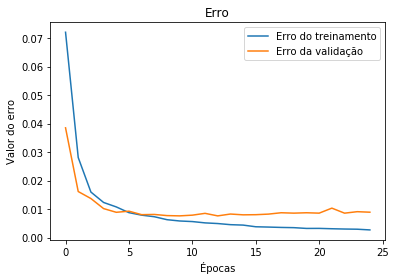

In [57]:
plt.plot(treinamento.history['loss'])
plt.plot(treinamento.history['val_loss'])
plt.title('Erro')
plt.xlabel('Épocas')
plt.ylabel('Valor do erro')
plt.legend(['Erro do treinamento','Erro da validação'])

Perto da quinta época o erro de validação se tornou constante assim o treinamento feito após essa época poderia ter sido descartado par apoupar processamento 